In [3]:
using LinearAlgebra
using FastGaussQuadrature
using Plots

include("AdaptiveSolver.jl")

thresholding (generic function with 1 method)

In [22]:
mesh = children(StaticRoots(),3)

meshdict = meshDict(mesh)

5×8 Matrix{Int64}:
 0  1   5   9  13  17  21  25
 2  6  10  14  18  22  26  29
 3  7  11  15  19  23  27  30
 4  8  12  16  20  24  28  31
 1  5   9  13  17  21  25   0

In [27]:
eigen(Symmetric(localStiffness))

Eigen{Float64, Float64, SMatrix{5, 5, Float64, 25}, SVector{5, Float64}}
values:
5-element SVector{5, Float64} with indices SOneTo(5):
  1.177159540914682e-15
  1.3461097100867117
  6.863320788776456
 16.9872236232466
 23.692234766779055
vectors:
5×5 SMatrix{5, 5, Float64, 25} with indices SOneTo(5)×SOneTo(5):
 0.447214   0.567854      0.459785    0.421357      0.297654
 0.447214   0.421357     -0.0846654  -0.567854     -0.541139
 0.447214   7.42566e-16  -0.750239    2.78379e-15   0.486971
 0.447214  -0.421357     -0.0846654   0.567854     -0.541139
 0.447214  -0.567854      0.459785   -0.421357      0.297654

In [16]:
Diagonal([-1,0,0,0,1]) *lobattoDiffMatrix- (Diagonal(lobattoweights)*lobattoDiffMatrix^2)

5×5 SizedMatrix{5, 5, Float64, 2, Matrix{Float64}} with indices SOneTo(5)×SOneTo(5):
  7.0       -7.82577    1.06667  -0.340897   0.1
 -7.82577   12.7037    -5.80741   1.27037   -0.340897
  1.06667   -5.80741    9.48148  -5.80741    1.06667
 -0.340897   1.27037   -5.80741  12.7037    -7.82577
  0.1       -0.340897   1.06667  -7.82577    7.0

In [40]:
s = SVector{5}(randn(5))


5-element SVector{5, Float64} with indices SOneTo(5):
 -0.5376932253409574
  1.3765184958528363
 -0.5475373918279897
  1.7036185832990747
  0.11805299067479637

In [52]:
a = zeros(SVector{5})
a[2:4]+= randn(3)

ErrorException: setindex!(::SVector{5, Float64}, value, ::Int) is not defined.
 Hint: Use `MArray` or `SizedArray` to create a mutable static array

In [48]:
using BenchmarkTools


In [55]:
lobattoDiffMatrix 

5×5 SizedMatrix{5, 5, Float64, 2, Matrix{Float64}} with indices SOneTo(5)×SOneTo(5):
 -10.0       13.513        -5.33333    2.82033      -1.0
  -2.48198    9.99201e-16   3.49149   -1.52753       0.518019
   0.75      -2.67317       0.0        2.67317      -0.75
  -0.518019   1.52753      -3.49149   -3.55271e-15   2.48198
   1.0       -2.82033       5.33333  -13.513        10.0

In [58]:
lobattoDiffMatrix * [0,1,0,0,0]

5-element SVector{5, Float64} with indices SOneTo(5):
 13.513004977448475
  9.992007221626409e-16
 -2.673169155390906
  1.5275252316519456
 -2.8203283558848504

In [34]:
localSmoother = 



StaticArrays.LU
L factor:
5×5 LowerTriangular{Float64, SMatrix{5, 5, Float64, 25}} with indices SOneTo(5)×SOneTo(5):
  1.0           ⋅           ⋅          ⋅         ⋅ 
 -0.558984     1.0          ⋅          ⋅         ⋅ 
  0.0761905   -0.625647    1.0         ⋅         ⋅ 
 -0.0243498    0.129642   -0.83159    1.0        ⋅ 
  0.00714286  -0.0342166   0.143446  -0.848911  1.0
U factor:
5×5 UpperTriangular{Float64, SMatrix{5, 5, Float64, 25}} with indices SOneTo(5)×SOneTo(5):
 14.0  -7.82577   1.06667  -0.340897   0.1
   ⋅    8.32923  -5.21116   1.07981   -0.284998
   ⋅     ⋅        6.13986  -5.10585    0.880739
   ⋅     ⋅         ⋅        8.30944   -7.05397
   ⋅     ⋅         ⋅         ⋅         7.875

In [31]:
localStiffness

5×5 SizedMatrix{5, 5, Float64, 2, Matrix{Float64}} with indices SOneTo(5)×SOneTo(5):
  7.0       -7.82577    1.06667  -0.340897   0.1
 -7.82577   12.7037    -5.80741   1.27037   -0.340897
  1.06667   -5.80741    9.48148  -5.80741    1.06667
 -0.340897   1.27037   -5.80741  12.7037    -7.82577
  0.1       -0.340897   1.06667  -7.82577    7.0

In [47]:
localSmoother*ones(5)

MethodError: MethodError: no method matching *(::StaticArrays.LU{LowerTriangular{Float64, SMatrix{5, 5, Float64, 25}}, UpperTriangular{Float64, SMatrix{5, 5, Float64, 25}}, SVector{5, Int64}}, ::Vector{Float64})

Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base operators.jl:587
  *(!Matched::Adjoint{<:Any, <:SparseArrays.CHOLMOD.Sparse}, ::VecOrMat)
   @ SparseArrays /opt/homebrew/Cellar/julia/1.10.2/share/julia/stdlib/v1.10/SparseArrays/src/solvers/cholmod.jl:1253
  *(!Matched::Adjoint{<:Number, <:AbstractVector}, ::AbstractVector{<:Number})
   @ LinearAlgebra /opt/homebrew/Cellar/julia/1.10.2/share/julia/stdlib/v1.10/LinearAlgebra/src/adjtrans.jl:462
  ...


In [49]:
(localStiffness+7*Diagonal([1,0,0,0,1]))*ones(5)

5-element SVector{5, Float64} with indices SOneTo(5):
 6.999999999999999
 2.220446049250313e-15
 1.3322676295501878e-15
 0.0
 7.0

unitvector (generic function with 1 method)

In [54]:
isbits(unitvector(3,10))

true

In [57]:
localSmoother

StaticArrays.LU
L factor:
5×5 LowerTriangular{Float64, SMatrix{5, 5, Float64, 25}} with indices SOneTo(5)×SOneTo(5):
  1.0           ⋅           ⋅          ⋅         ⋅ 
 -0.558984     1.0          ⋅          ⋅         ⋅ 
  0.0761905   -0.625647    1.0         ⋅         ⋅ 
 -0.0243498    0.129642   -0.83159    1.0        ⋅ 
  0.00714286  -0.0342166   0.143446  -0.848911  1.0
U factor:
5×5 UpperTriangular{Float64, SMatrix{5, 5, Float64, 25}} with indices SOneTo(5)×SOneTo(5):
 14.0  -7.82577   1.06667  -0.340897   0.1
   ⋅    8.32923  -5.21116   1.07981   -0.284998
   ⋅     ⋅        6.13986  -5.10585    0.880739
   ⋅     ⋅         ⋅        8.30944   -7.05397
   ⋅     ⋅         ⋅         ⋅         7.875

In [58]:
lu(localStiffness +7*Diagonal([1,0,0,0,1]))

StaticArrays.LU
L factor:
5×5 LowerTriangular{Float64, SMatrix{5, 5, Float64, 25}} with indices SOneTo(5)×SOneTo(5):
  1.0           ⋅           ⋅          ⋅         ⋅ 
 -0.558984     1.0          ⋅          ⋅         ⋅ 
  0.0761905   -0.625647    1.0         ⋅         ⋅ 
 -0.0243498    0.129642   -0.83159    1.0        ⋅ 
  0.00714286  -0.0342166   0.143446  -0.848911  1.0
U factor:
5×5 UpperTriangular{Float64, SMatrix{5, 5, Float64, 25}} with indices SOneTo(5)×SOneTo(5):
 14.0  -7.82577   1.06667  -0.340897   0.1
   ⋅    8.32923  -5.21116   1.07981   -0.284998
   ⋅     ⋅        6.13986  -5.10585    0.880739
   ⋅     ⋅         ⋅        8.30944   -7.05397
   ⋅     ⋅         ⋅         ⋅         7.875

In [86]:
vals = SVector{5}(lobattonodes.^2)

5-element SVector{5, Float64} with indices SOneTo(5):
 0.0
 0.029816021788868562
 0.25
 0.6844696924968459
 1.0

In [87]:
f(x) = eval(x, vals)

f (generic function with 1 method)

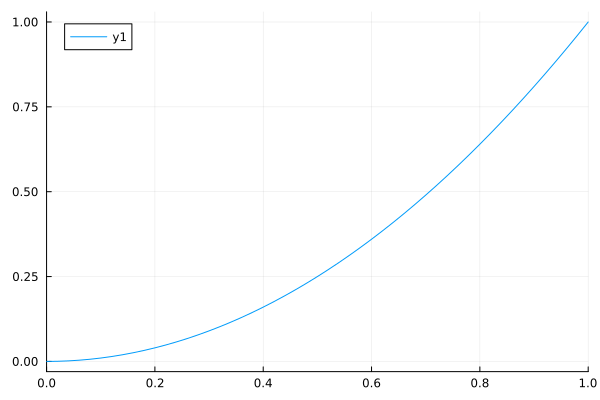

In [88]:
n = 50
x = (0:n)./n
plot(x,f.(x), xlims= (0,1))

In [82]:
lobattoDiffMatrix^2 *vals

5-element SVector{5, Float64} with indices SOneTo(5):
 -0.9999999999999946
 -1.0000000000000002
 -0.9999999999999989
 -0.9999999999999992
 -0.9999999999999978

In [92]:
sum(lobattonodes.*(1 .-lobattonodes) .*lobattoweights)

0.16666666666666663

In [94]:
inv([2 -1 0 ;-1 2 -1;0 -1 2])

3×3 Matrix{Float64}:
 0.75  0.5  0.25
 0.5   1.0  0.5
 0.25  0.5  0.75

In [96]:
println(inv([2 -1; -1 2]))

[0.6666666666666666 0.3333333333333333; 0.3333333333333333 0.6666666666666666]


In [98]:
SMatrix{2,2}([2/3 1/3; 1/3 2/3])

2×2 SMatrix{2, 2, Float64, 4} with indices SOneTo(2)×SOneTo(2):
 0.666667  0.333333
 0.333333  0.666667

In [5]:
SVector{polydegree+1,Float64}(zeros(polydegree+1))

5-element SVector{5, Float64} with indices SOneTo(5):
 0.0
 0.0
 0.0
 0.0
 0.0

In [12]:
u = [1/8,0.11799311389446722, 0.07366071428571429, 0.025228460449556053,0]
lobattoDiffMatrix * u

5-element Vector{Float64}:
 0.125
 0.11799311389446722
 0.07366071428571429
 0.025228460449556053
 0.0

In [16]:
u = SVector{5, Float64}([0.5454738697692817, 0.31680139497020177, 0.1915487794010733, 0.21659930251489928, 0.18833101262642415])

5-element SVector{5, Float64} with indices SOneTo(5):
 0.5454738697692817
 0.31680139497020177
 0.1915487794010733
 0.21659930251489928
 0.18833101262642415

In [17]:
f(x) = eval(x,SVector{polydegree+1}(u))

f (generic function with 1 method)

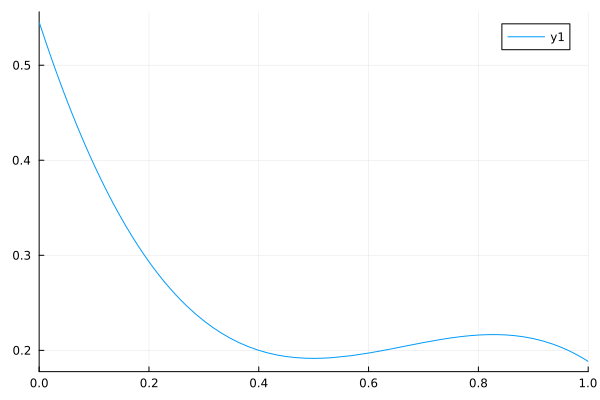

In [18]:
plot(f, xlims = (0,1))